In [2]:
import pandas as pd

In [3]:
#data_source_url = "https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv"
data = pd.read_csv("Tweets.csv")

In [4]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


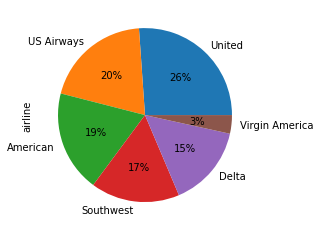

In [6]:
%matplotlib inline
data.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

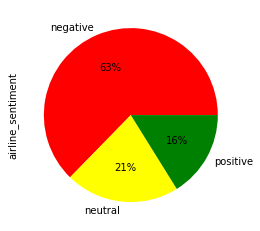

In [7]:
data.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

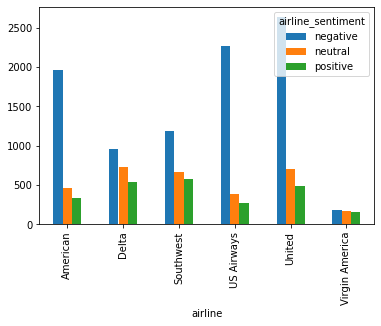

In [8]:
airline_sentiment = data.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

In [9]:
features = data['text'].values
labels = data['airline_sentiment'].values

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

count_vec = TfidfVectorizer(max_features = 100, max_df = 0.8, min_df = 0.01, stop_words = 'english', ngram_range = (1, 2))

x_train = count_vec.fit_transform(X_train)
feature_names = count_vec.get_feature_names()
feature_names

['aa',
 'agent',
 'airline',
 'airport',
 'americanair',
 'amp',
 'bag',
 'baggage',
 'bags',
 'best',
 'cancelled',
 'cancelled flighted',
 'cancelled flightled',
 'change',
 'check',
 'crew',
 'customer',
 'customer service',
 'day',
 'days',
 'delay',
 'delayed',
 'did',
 'didn',
 'dm',
 'don',
 'email',
 'experience',
 'flight',
 'flight cancelled',
 'flighted',
 'flightled',
 'flights',
 'fly',
 'flying',
 'gate',
 'getting',
 'going',
 'good',
 'got',
 'great',
 'guys',
 'help',
 'hold',
 'home',
 'hour',
 'hours',
 'hrs',
 'http',
 'jetblue',
 'jfk',
 'just',
 'know',
 'late',
 'late flight',
 'let',
 'like',
 'll',
 'lost',
 'love',
 'luggage',
 'make',
 'minutes',
 'need',
 'new',
 'number',
 'online',
 'people',
 'phone',
 'plane',
 'problems',
 'really',
 'response',
 'right',
 'seat',
 'seats',
 'service',
 'southwestair',
 'thank',
 'thanks',
 'ticket',
 'time',
 'today',
 'told',
 'tomorrow',
 'travel',
 'trip',
 'trying',
 'united',
 'usairways',
 've',
 'virginamerica',

In [12]:
len(feature_names)

100

In [14]:

x_test = count_vec.fit_transform(X_test)

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rfc = RandomForestClassifier(n_estimators = 2000, n_jobs = -1)

In [17]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [18]:
y_pred = rfc.predict(x_test)

In [19]:
y_pred.shape

(2928,)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[1660   93  117]
 [ 505   64   45]
 [ 329   37   78]]
              precision    recall  f1-score   support

    negative       0.67      0.89      0.76      1870
     neutral       0.33      0.10      0.16       614
    positive       0.33      0.18      0.23       444

    accuracy                           0.62      2928
   macro avg       0.44      0.39      0.38      2928
weighted avg       0.54      0.62      0.55      2928

0.6154371584699454


In [21]:
import numpy as np

In [23]:
np.savetxt(fname = 'predictions2.csv', X = y_pred, fmt = '%s')

In [24]:
x_test.shape


(2928, 100)

In [25]:
X_test.shape

(2928,)

In [26]:
X_test[2]

"@SouthwestAir can't believe how many paying customers you left high and dry with no reason for flight Cancelled Flightlations Monday out of BDL! Wow."

In [27]:
y_pred.shape

(2928,)

In [28]:
y_pred[2]

'negative'